In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/spark/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# two cells

In [1]:
!ls /home/spark/2017_for_Zhong/2cell_13611_13618

isoseq_flnc.fasta  preCluster.output.csv


In [19]:
def read_fasta(fname):
    lst=[]
    seq=None
    with open (fname) as f:
        for line in f:
            if line.startswith(">"):
                if seq: lst.append(seqid+"\t"+"".join(seq))
                seqid=line.split(" ")[0][1:]
                seq=[]
            else:
                seq.append(line.strip())
    if seq: lst.append(seqid+"\t"+"".join(seq))
    return lst

In [2]:
lst=read_fasta("/home/spark/2017_for_Zhong/2cell_13611_13618/isoseq_flnc.fasta")

In [3]:
len(lst)

375241

In [15]:
with open("2cell_13611_13618.seq",'w') as f:
    for i,l in enumerate(lst):
        f.write(str(i+1)+"\t"+l+"\n")

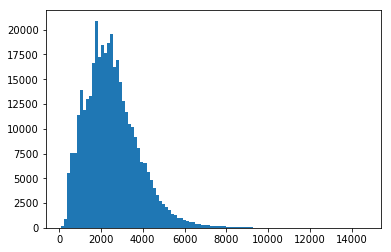

In [9]:
plt.hist([len(u) for u in lst],bins=100);

In [26]:
import pandas as pd
output=pd.read_csv("/home/spark/2017_for_Zhong/2cell_13611_13618/preCluster.output.csv")

/home/spark/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
output.shape,output[output['stat']=="chimera"].shape, output[output['stat']=="orphan"].shape

((375241, 2), (4713, 2), (24634, 2))

In [38]:
vc=output['stat'].value_counts()
vc.describe()

count    27977.000000
mean        13.412482
std        237.283716
min          1.000000
25%          2.000000
50%          3.000000
75%          9.000000
max      26358.000000
Name: stat, dtype: float64

In [51]:
vc[vc>100].head(20)

13293      26358
orphan     24634
20327       8634
13293       8426
9139        6582
chimera     4713
4011        3576
13358       2921
20327       2763
9139        2016
18157       1816
225         1758
15862       1658
13374       1366
15993       1174
4011        1151
13358        943
15956        943
16437        785
1814         684
Name: stat, dtype: int64

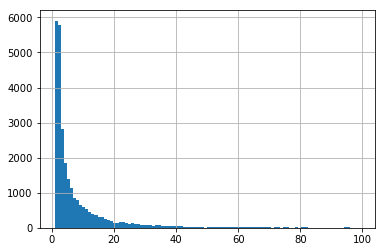

In [49]:
vc[vc<100].hist(bins=100);

# 3cell

In [11]:
!ls /home/spark/2017_for_Zhong/3cell_13611_13618_15864/

isoseq_flnc.fasta  preCluster.output.csv


In [20]:
lst=read_fasta("/home/spark/2017_for_Zhong/3cell_13611_13618_15864/isoseq_flnc.fasta")

In [21]:
len(lst)

623456

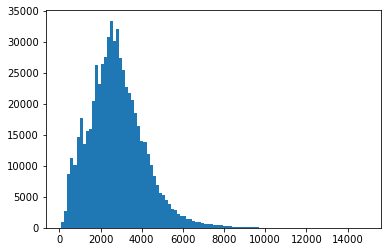

In [22]:
plt.hist([len(u) for u in lst],bins=100);

In [23]:
with open("3cell_13611_13618_15864.seq",'w') as f:
    for i,l in enumerate(lst):
        f.write(str(i+1)+"\t"+l+"\n")

In [230]:
import pandas as pd
output=pd.read_csv("/home/spark/2017_for_Zhong/3cell_13611_13618_15864//preCluster.output.csv")

In [231]:
output.head()

,seqid,stat
0,m54006_170206_215027/39191167/4082_54_CCS,4621
1,m54086_170204_081430/14549373/3042_55_CCS,14536
2,m54086_170204_081430/72221299/30_2823_CCS,21000
3,m54006_170206_215027/24511254/1853_57_CCS,19294
4,m54006_170206_215027/22872994/31_479_CCS,7358


In [53]:
output.shape,output[output['stat']=="chimera"].shape, output[output['stat']=="orphan"].shape

((623456, 2), (7185, 2), (36298, 2))

In [54]:
vc=output['stat'].value_counts()
vc.describe()

count    32958.000000
mean        18.916682
std        432.005010
min          1.000000
25%          2.000000
50%          3.000000
75%         10.000000
max      64655.000000
Name: stat, dtype: float64

In [58]:
vc[vc>100].head(20)#/float(vc.sum())

4621       64655
orphan     36298
3369       16779
29212      12138
chimera     7185
4621        6713
20983       4401
20806       2798
22468       2461
15820       2461
22247       2447
22243       2381
611         1920
26070       1898
3369        1720
25593       1715
21000       1696
26888       1659
11819       1598
25574       1443
Name: stat, dtype: int64

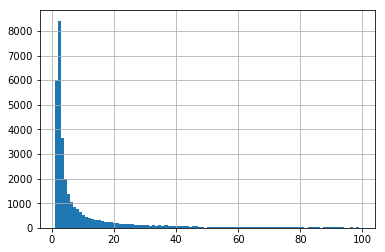

In [56]:
vc[vc<100].hist(bins=100);

In [232]:
with open("../tmp/3cell_13611_13618_15864_lpa.txt_31") as f:
    lines=[u.strip().split(",") for u in f.readlines()]

In [233]:
vc=pd.Series([len(u) for u in lines]).sort_values(ascending=False)

In [81]:
vc.sum()/623456.

0.93891148693733

In [82]:
vc[vc>100].head(20)#/float(vc.sum())

6389     3979
5564     3410
12103    2967
259      2764
13928    2635
7667     2607
11713    2577
9705     2511
14257    2288
14341    1867
12524    1653
9381     1634
5729     1563
9184     1344
90       1341
8396     1275
8926     1273
7675     1264
1239     1127
7066     1092
dtype: int64

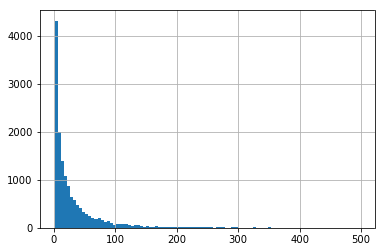

In [85]:
vc[vc<500].hist(bins=100);

In [87]:
vc[vc==2].shape

(1568,)

In [237]:
import pandas as pd
preClusters=pd.read_csv("/home/spark/2017_for_Zhong/3cell_13611_13618_15864//preCluster.output.csv")

In [235]:
lpaClusters=pd.read_csv("../tmp/3cell_13611_13618_15864_lpaseq.txt_31",header=None,sep="\t")
lpaClusters.columns=['seqid','stat']

In [236]:
lpaClusters.head()

,seqid,stat
0,m54006_170620_003210/23593840/4318_53_CCS,1906
1,m54086_170204_081430/45351714/31_1884_CCS,3139
2,m54086_170204_081430/32047532/3383_54_CCS,2516
3,m54086_170204_081430/27263553/3208_52_CCS,3327
4,m54006_170206_215027/64618994/33_4308_CCS,6277


In [256]:
a=pd.merge(preClusters,lpaClusters, on='seqid', how='left')

In [257]:
lpaClusters.shape,preClusters.shape,a.shape

((585370, 2), (623456, 2), (623456, 3))

In [258]:
a=a.fillna("-999").drop("stat_x",axis=1)
a.columns=['seqid','stat']
a.stat=a.stat.astype(np.int)
a.loc[a.stat==-999,'stat']='orphan'

In [259]:
a.shape

(623456, 2)

In [260]:
a.to_csv("../tmp/3cell_13611_13618_15864_cluster.csv",index=None)

In [238]:
preClusters.head()

,seqid,stat
0,m54006_170206_215027/39191167/4082_54_CCS,4621
1,m54086_170204_081430/14549373/3042_55_CCS,14536
2,m54086_170204_081430/72221299/30_2823_CCS,21000
3,m54006_170206_215027/24511254/1853_57_CCS,19294
4,m54006_170206_215027/22872994/31_479_CCS,7358


In [96]:
joined=pd.merge(lpaClusters,preClusters, on='seqid')

In [98]:
joined.head()

,seqid,clusterid,stat
0,m54006_170620_003210/23593840/4318_53_CCS,1906,4621
1,m54086_170204_081430/45351714/31_1884_CCS,3139,4965
2,m54086_170204_081430/32047532/3383_54_CCS,2516,5013
3,m54086_170204_081430/27263553/3208_52_CCS,3327,3111
4,m54006_170206_215027/64618994/33_4308_CCS,6277,4621


In [129]:
joined=joined[~joined['stat'].isin(['chimera',"orphan"])] 

In [187]:
def calc_purity(df):
    vc=df['stat'].value_counts()
    return [1.0*vc.max()/df.shape[0],df.shape[0],vc.shape[0]]

In [188]:
purity=pd.DataFrame(joined[['clusterid','stat']].groupby('clusterid').apply(lambda u:calc_purity(u)))

In [189]:
purity['purity']=purity[0].map(lambda u: u[0])
purity['size']=purity[0].map(lambda u: u[1])
purity['n']=purity[0].map(lambda u: u[2])
purity=purity.drop(0,axis=1)

In [190]:
np.median(purity.purity)

0.8571428571428571

In [191]:
purity.columns=['purity','size','n']

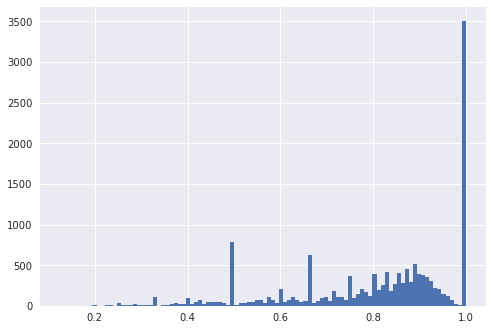

In [192]:
purity.purity.hist(bins=100);

In [193]:
import seaborn as sns
sns.set()

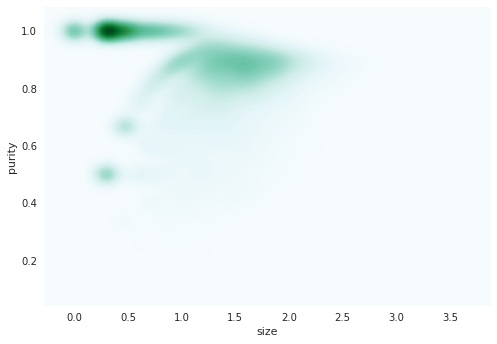

In [195]:
a=purity
sns.kdeplot(np.log10(a['size']),a.purity, n_levels=100, shade=True, shade_lowest=True)

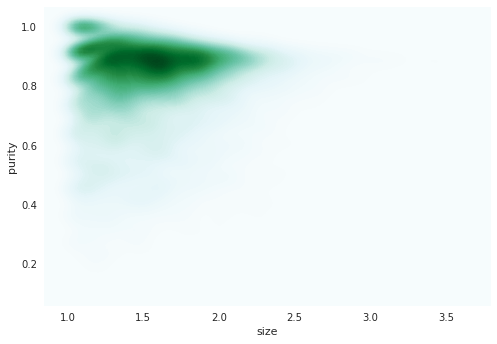

In [203]:
a=purity[purity['size']>10]
sns.kdeplot(np.log10(a['size']),a.purity, n_levels=100, shade=True, shade_lowest=True)

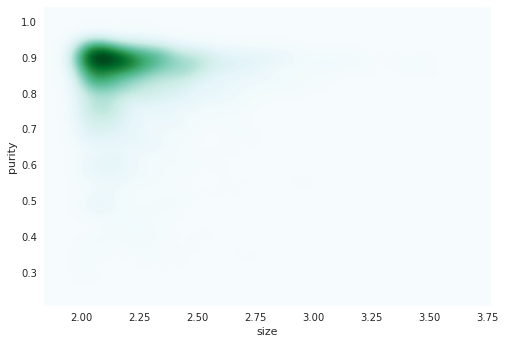

In [204]:
a=purity[purity['size']>100]
sns.kdeplot(np.log10(a['size']),a.purity, n_levels=100, shade=True, shade_lowest=True)

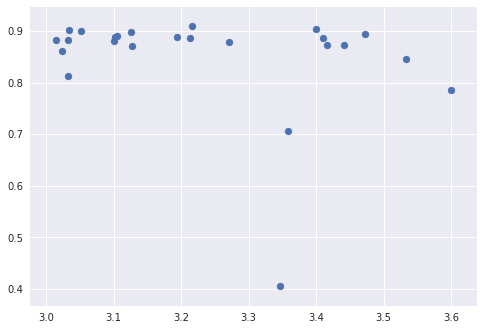

In [199]:
a=purity[purity['size']>1000]
plt.scatter(np.log10(a['size']),a.purity)

In [205]:
def calc_completeness(df):
    vc=df['clusterid'].value_counts()
    return [1.0*vc.max()/df.shape[0],df.shape[0],vc.shape[0]]

In [206]:
purity=pd.DataFrame(joined[['clusterid','stat']].groupby('stat').apply(lambda u:calc_completeness(u)))

In [207]:
purity['purity']=purity[0].map(lambda u: u[0])
purity['size']=purity[0].map(lambda u: u[1])
purity['n']=purity[0].map(lambda u: u[2])
purity=purity.drop(0,axis=1)

In [208]:
np.median(purity.purity)

1.0

In [209]:
purity.columns=['purity','size','n']

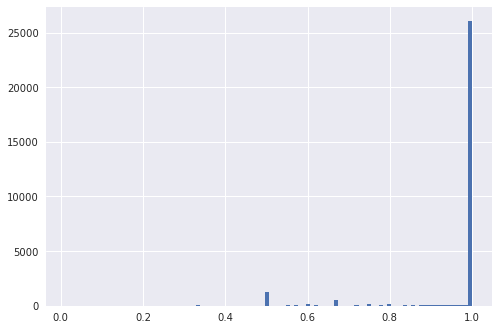

In [210]:
(purity.purity).hist(bins=100);

In [211]:
import seaborn as sns
sns.set()

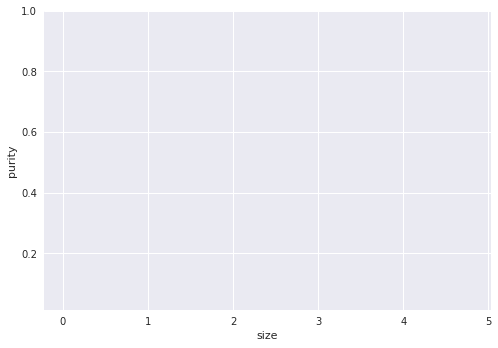

In [212]:
a=purity[purity['size']>=0]
sns.kdeplot(np.log10(a['size']),a.purity, n_levels=100, shade=True, shade_lowest=True)

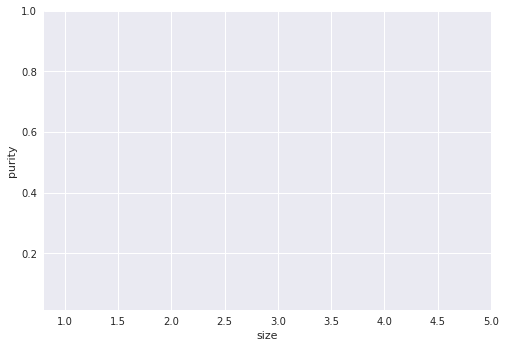

In [213]:
a=purity[purity['size']>=10]
sns.kdeplot(np.log10(a['size']),a.purity, n_levels=100, shade=True, shade_lowest=True)

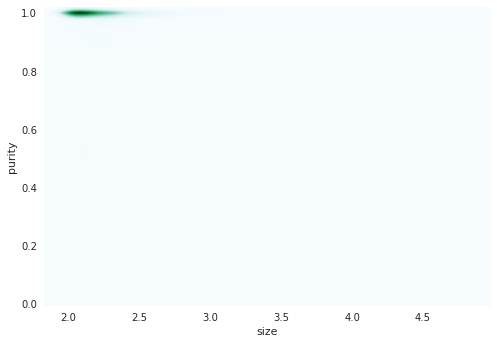

In [214]:
a=purity[purity['size']>=100]
sns.kdeplot(np.log10(a['size']),a.purity, n_levels=100, shade=True, shade_lowest=True)

(27, 3)

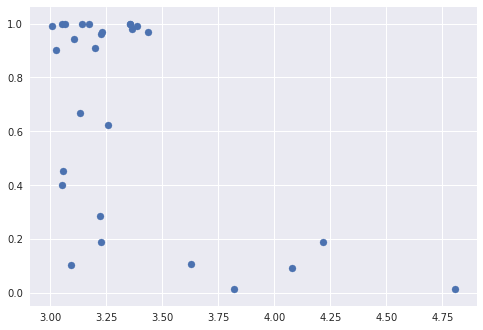

In [221]:
a=purity[purity['size']>1000]
plt.scatter(np.log10(a['size']),a.purity)
a.shape

In [215]:
purity[purity['size']>10000]

,purity,size,n
stat,,,
3369,0.190294,16443,698
4621,0.014075,63799,2846
29212,0.092707,11984,226


In [217]:
lpaClusters.clusterid.value_counts().max()

3979

In [223]:
lpaClusters.shape,preClusters.shape

((585370, 2), (623456, 2))

In [224]:
623456-585370

38086

In [229]:
preClusters['stat'].value_counts().sort_index().tail()

9992           5
9995          24
9997           3
chimera     7185
orphan     36298
Name: stat, dtype: int64